# Introduction

Housing Price Prediction is a data-driven project that aims to explore and understand the relationships between independent variables and dependent variable. Features such as area type, location, size, number of bathrooms and balconies, total square footage, and energy ratings (BER) play a critical role in determining the property prices in Ireland. The project follows a systematic approach involving several key stages:

* Initial Data Exploration: This phase involves gaining an in-depth understanding of the dataset using statistical description as well as graphical presentation. Exploratory Data Analysis (EDA) techniques are used to uncover patterns, trends, and correlations between dependent and the target variable. Visualizations such as scatter plots, catplot, pie-chart, box plots, and heatmaps help identify data patterns, outliers, missing values, and the relationships between various features. 

* Data Preprocessing: The preprocessing stage focuses on cleaning and preparing the dataset for analysis. This includes handling missing values, identifying and handling the outliers, and removing duplicate or irrelevant data. Ensuring the dataset is clean and consistent is vital for building machine learning models.

* Feature Engineering: In this stage, additional features are created or existing ones are transformed to better capture the non-linear relationships in the data. Techniques such as one-hot encoding, training and testing split data, and feature scaling such as StandardScaler are performed to optimize the model performance.

* Model Building: Machine learning models such as Linear Regression, Lasso Regression, Support Vector Machine, Random Forest, XGBoost Regressor, and Gradient Boosting Regressor are implemented to predict property prices. Multiple algorithms are evaluated to determine the best-performing model. Performance metrics such as R-squared and RMSE are used to compare models and understand their predictive accuracy.

* Hyperparameter Tuning: Once a suitable model is identified, hyperparameter tuning techniques, such as Grid Search or Randomized Search, are employed to fine-tune the model's parameters. This ensures that the model achieves optimal performance by balancing overfitting and underfitting.

Through these stages, the Housing Price Prediction project aims to provide actionable insights into the factors influencing property prices, helping stakeholders make informed decisions and enhancing market understanding.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Importing the data set

In [2]:
irish_house_price = pd.read_csv('Ireland+House+Price+Final.csv')
irish_house_price.head()

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3 BED,1440,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3 BED,1521,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2 BED,1200,2.0,1.0,No,F,Yes,482.375000


# Data description

* ID: The feature “ID” represents as the primary key for the data set. ID can be used as an index function while importing the data and performing operations. 
* Area type: The feature has four indicators such as Super built-up area, Plot area, Built-up area and Carpet area which describe the background of the property.
* Availability: In this feature, we can understand there are two indicators which represents “Ready to move”, "Immediate possession" and move in dates for the year 2025. 
* Location: The “Location” feature has listed the areas in Ireland.
* Size: The feature “Size” represents the number of bedrooms available in the property. The minimum size of the bed is 1 and maximum size of the bed is 43 which are two extreme points in the distribution. 
* Total square feet: The feature describes area of property measure in square foot.
* Bath: The feature describes the total number of bathrooms available in the property.
* Balcony: The feature describes the total number of balconies available in the property. 
* BER: The feature represents the property's energy ratings. 
* Price as per sqft: The independent feature which describes the property price as per square foot.

# Initial data exploration

In [9]:
irish_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13320 non-null  int64  
 1   area_type         13320 non-null  object 
 2   availability      13320 non-null  object 
 3   location          13319 non-null  object 
 4   size              13304 non-null  object 
 5   total_sqft        13320 non-null  object 
 6   bath              13247 non-null  float64
 7   balcony           12711 non-null  float64
 8   BER               13320 non-null  object 
 9   price-per-sqft-$  13074 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


In [10]:
irish_house_price.isnull().sum()

ID                    0
area_type             0
availability          0
location              1
size                 16
total_sqft            0
bath                 73
balcony             609
BER                   0
price-per-sqft-$    246
dtype: int64

In [11]:
irish_house_price[['bath', 'balcony', 'price-per-sqft-$']].describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
bath,13247.000000,2.692610,1.341458,1.000000,2.000000,2.000000,3.000000,40.000000
balcony,12711.000000,1.584376,0.817263,0.000000,1.000000,2.000000,2.000000,3.000000
price-per-sqft-$,13074.000000,1427.913033,46114.349747,30.398684,484.187296,619.090909,833.817225,4953333.273000


# Statistical description

# Measures of Central Tendency

In [14]:
# A python program to find the "Measures of Central Tendency" before data-preperation [price-per-sqft-$]

skewness_irish_house_price = round(irish_house_price['price-per-sqft-$'].skew(), 2)
kurtosis_irish_house_price = round(irish_house_price['price-per-sqft-$'].kurt(), 2)
median_irish_house_price = round(irish_house_price['price-per-sqft-$'].median(), 2)
mode_irish_house_price = irish_house_price['price-per-sqft-$'].mode()

summary_data_central = pd.DataFrame({
    'Metric': ['Skewness', 'Kurtosis', 'Median', 'Mode'],
    'Value': [skewness_irish_house_price, kurtosis_irish_house_price, median_irish_house_price, mode_irish_house_price[0]]})

print("The statistical summary on \"Measures of central tendency\" for the feature: \"price-per-sqft-$\" \n")
print(tabulate(summary_data_central, headers= 'keys', tablefmt= 'pretty'))

The statistical summary on "Measures of central tendency" for the feature: "price-per-sqft-$" 

+---+----------+----------+
|   |  Metric  |  Value   |
+---+----------+----------+
| 0 | Skewness |  97.49   |
| 1 | Kurtosis | 10243.85 |
| 2 |  Median  |  619.09  |
| 3 |   Mode   |  567.5   |
+---+----------+----------+


# Summary: 
* Skewness (97.49): The highly positive skewness indicates that the distribution is heavily skewed to the right, with a long tail of higher values. This suggests the presence of extreme outliers in the dataset.

* Kurtosis (10243.85): The extremely high kurtosis value signifies that the data has a sharp peak and heavy tails, reinforcing the impact of outliers in the distribution.

* Median (619.09): The median reflects the central value in the dataset, showing that 50% of the values are below 619.09. This is less influenced by outliers compared to the mean.

* Mode (567.5): The mode, being the most frequently occurring value, provides an indication of the most common price-per-square-foot in the dataset.

Overall, the analysis suggests a heavily skewed distribution with significant outliers, highlighting the need for preprocessing techniques such as outlier handling or data transformation for better model performance.

# Measures of Dispersion

In [16]:
variance_irish_house_price = round(irish_house_price['price-per-sqft-$'].var(), 2)
range_irish_house_price = irish_house_price['price-per-sqft-$'].max() - irish_house_price['price-per-sqft-$'].min()
stdev_irish_house_price = round(irish_house_price['price-per-sqft-$'].std(), 2)

summary_data_dispersion = pd.DataFrame({
    'Metric': ['Standard Deviation', 'Variance', 'Range'],
    'Value': [stdev_irish_house_price, variance_irish_house_price, range_irish_house_price]
})

print("The statistical summary on \"Measures of dispersion\" for the feature: \"price-per-sqft-$\" \n")
print(tabulate(summary_data_dispersion, headers= 'keys', tablefmt= 'pretty'))

The statistical summary on "Measures of dispersion" for the feature: "price-per-sqft-$" 

+---+--------------------+------------------+
|   |       Metric       |      Value       |
+---+--------------------+------------------+
| 0 | Standard Deviation |     46114.35     |
| 1 |      Variance      |  2126533252.62   |
| 2 |       Range        | 4953302.87431619 |
+---+--------------------+------------------+


# Summary:
* Standard Deviation (46,114.35): The data points for price-per-square-foot show a high level of variation, with an average deviation of 46,114.35 from the mean value, indicating significant price fluctuations.

* Variance (2,126,533,252.62): The large variance confirms the high variability in the dataset, suggesting that prices differ considerably across properties.

* Range (4,953,302.87): The difference between the maximum and minimum price-per-square-foot is exceptionally large, pointing to a broad spectrum of property values.

This summary suggests that the feature "price-per-sqft-$" exhibits substantial variability, possibly due to outliers or differences in property location, size, or other influencing factors. Further analysis or data normalization might be required for better interpretability and modeling.

# Exploratory data analysis [Before data cleansing]

# Pairplot (Scatter plot matrix)

# Correlation heat map

<Axes: >

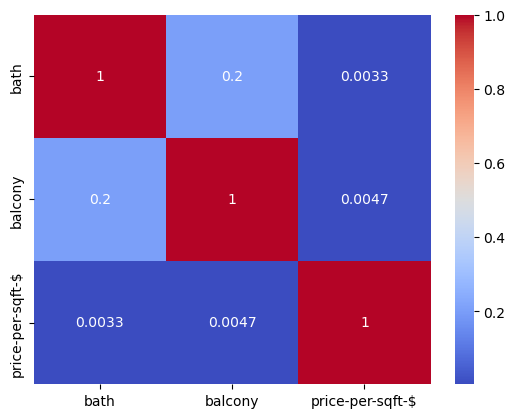

In [19]:
ihp = ["bath", "balcony", "price-per-sqft-$"]
sns.heatmap(irish_house_price[ihp].corr(),cmap="coolwarm", annot=True)

# Observation: [Phase this well]

The heatmap represents the correlation between the numerical features in the dataset. Correlation measures the statistical relationship between two variables, with values ranging from -1 to 1:

Positive Correlation: When one variable increases, the other variable also increases (correlation value > 0). For example, the correlation between bath and balcony is 0.2, indicating a weak positive correlation.

Negative Correlation: When one variable increases, the other decreases (correlation value < 0). There are no examples of negative correlation in this heatmap.

No Correlation: When the correlation value is close to 0, there is no significant relationship between the variables. For instance, price-per-sqft-$ and bath have a correlation of 0.0033, suggesting almost no correlation.

Observations from the heatmap:
Bath and Balcony (0.2): Weak positive correlation, implying properties with more bathrooms might slightly tend to have more balconies.
Bath and Price-per-sqft-$ (0.0033): No correlation, suggesting the number of bathrooms does not influence the price per square foot.
Balcony and Price-per-sqft-$ (0.0047): Almost no correlation, indicating balconies have no significant effect on price per square foot.
In summary, the heatmap reveals that the numerical features in this dataset have weak or no significant correlations with each other. This indicates that these features might have limited interdependence, requiring more feature engineering or exploration of other variables to improve predictions.

# Box whisker plot

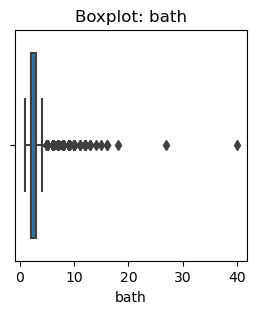

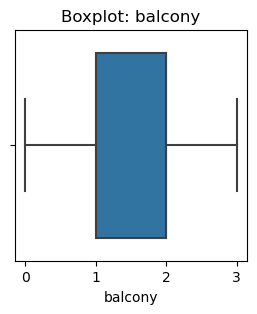

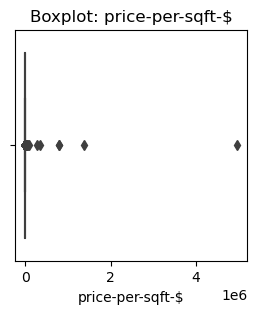

In [20]:
for i in irish_house_price.select_dtypes(include= "float").columns:
    plt.figure(figsize= (3, 3))
    sns.boxplot(x= i, data= irish_house_price)  
    plt.title(f'Boxplot: {i}')
    plt.show()  

# Observation: [Phase this]

Box (Interquartile Range - IQR):

The box itself represents the range between the 25th percentile (Q1) and the 75th percentile (Q3).
This range is called the interquartile range (IQR) and captures the middle 50% of the data points.
Outliers (Dots beyond the whiskers):

Any data points beyond the whiskers are considered outliers.
In this plot, there are several extreme outliers, including properties with as many as 20, 30, or 40 bathrooms. These values are far from the majority and may require further investigation or cleaning

Most properties have a small number of bathrooms, likely 1 to 4 (as seen in the compressed main box area).
There are outliers with unusually high bathroom counts, which might be errors, special cases (e.g., luxury mansions), or require further domain-specific validation.
This boxplot highlights the need for handling outliers if they distort analysis or model training.

[Do the same for Price as well]
1. Boxplot: Balcony
Feature Description: This boxplot represents the distribution of the number of balconies in the dataset.

Box (IQR):

The blue box represents the interquartile range (IQR), which contains the middle 50% of the data (from the 25th percentile to the 75th percentile).
In this case, most properties seem to have between 1 to 2 balconies.
Median:

The horizontal line inside the box represents the median value, likely 1 balcony. This indicates that most properties have 1 balcony.
Whiskers:

The whiskers extend to the minimum and maximum values within 1.5 times the IQR.
There are no outliers beyond the whiskers, suggesting the balcony data is clean and falls within expected ranges.

 Boxplot: Price per Square Foot ($)
Feature Description: This boxplot visualizes the distribution of the price per square foot in dollars.

Box (IQR):

The box is very small, indicating a highly skewed distribution. The majority of the price-per-square-foot values are clustered in a narrow range near the lower end.
Median:

The median (horizontal line inside the box) appears close to the lower bound, showing that the majority of properties have a relatively low price per square foot.
Outliers:

There are significant outliers far above the whiskers, with some extreme values reaching up to 4,000,000 dollars per square foot.
These outliers could represent rare cases, such as luxury properties or errors in data entry, and should be further investigated.

Key Observations:
The balcony data appears to be well-distributed and does not have outliers.
The price-per-square-foot data shows extreme outliers, which may need to be handled (e.g., through capping, removing, or normalizing) to ensure the data is suitable for modeling

# Data pre-processing

In [22]:
irish_house_price.isnull().sum()

ID                    0
area_type             0
availability          0
location              1
size                 16
total_sqft            0
bath                 73
balcony             609
BER                   0
price-per-sqft-$    246
dtype: int64

In [23]:
irish_house_pricecounts = irish_house_price['size'].value_counts().reset_index()
irish_house_pricecounts.columns = ['size', 'Counts']

print("Computing the value counts of \"total_sqfeet\" feature:\n", tabulate(irish_house_pricecounts, headers= 'keys', tablefmt= 'pretty'))

Computing the value counts of "total_sqfeet" feature:
 +----+------------+--------+
|    |    size    | Counts |
+----+------------+--------+
| 0  |   2 BHK    |  5199  |
| 1  |   3 BHK    |  4310  |
| 2  | 4 Bedroom  |  826   |
| 3  |   4 BHK    |  591   |
| 4  | 3 Bedroom  |  547   |
| 5  |   1 BHK    |  538   |
| 6  | 2 Bedroom  |  329   |
| 7  | 5 Bedroom  |  297   |
| 8  | 6 Bedroom  |  191   |
| 9  | 1 Bedroom  |  105   |
| 10 | 8 Bedroom  |   84   |
| 11 | 7 Bedroom  |   83   |
| 12 |   5 BHK    |   59   |
| 13 | 9 Bedroom  |   46   |
| 14 |   6 BHK    |   30   |
| 15 |   7 BHK    |   17   |
| 16 |    1 RK    |   13   |
| 17 | 10 Bedroom |   12   |
| 18 |   9 BHK    |   8    |
| 19 |   8 BHK    |   5    |
| 20 |   11 BHK   |   2    |
| 21 | 11 Bedroom |   2    |
| 22 |   10 BHK   |   2    |
| 23 |   14 BHK   |   1    |
| 24 |   13 BHK   |   1    |
| 25 | 12 Bedroom |   1    |
| 26 |   27 BHK   |   1    |
| 27 | 43 Bedroom |   1    |
| 28 |   16 BHK   |   1    |
| 29 |   19 BHK  

In [24]:
irish_house_price['location'] = irish_house_price['location'].fillna('Other')

In [25]:
irish_house_size = {'1 Bedroom': 1,
                    '2 BHK': 2,
                    '2 Bedroom': 2,
                    '3 BHK': 3,
                    '3 Bedroom': 3,
                    '4 BHK': 4,
                    '4 Bedroom': 4,
                    '1 BHK': 1,
                    '5 BHK': 3,
                    '5 Bedroom': 5,
                    '6 BHK': 6,
                    '6 Bedroom': 6,
                    '7 BHK': 7,
                    '7 Bedroom': 7,
                    '1 RK': 1,
                    '9 BHK': 9,
                    '9 Bedroom': 9,
                    '8 BHK': 8,
                    '8 Bedroom': 8,
                    '11 BHK': 11,
                    '12 Bedroom': 12,
                    '11 Bedroom': 11,
                    '10 BHK': 10,
                    '10 Bedroom': 10,
                    '14 BHK': 14,
                    '13 BHK': 13,
                    '27 BHK': 27,
                    '16 BHK': 16,
                    '18 Bedroom': 18,
                    '19 BHK': 19,
                    '43 Bedroom': 43}
                    
irish_house_price['size'].replace(irish_house_size, inplace= True)    

In [26]:
irish_house_price['size'].fillna(irish_house_price['size'].median(), inplace=True)

In [27]:
irish_house_pricecounts = irish_house_price['total_sqft'].value_counts().reset_index().tail(10)
irish_house_pricecounts.columns = ['total_sqft', 'Counts']

print("Computing the value counts of \"total_sqft\" feature:\n", tabulate(irish_house_pricecounts, headers= 'keys', tablefmt= 'pretty'))

Computing the value counts of "total_sqft" feature:
 +------+-------------+--------+
|      | total_sqft  | Counts |
+------+-------------+--------+
| 2107 |    2370     |   1    |
| 2108 |      5      |   1    |
| 2109 |    1004     |   1    |
| 2110 |    5985     |   1    |
| 2111 | 2466 - 2856 |   1    |
| 2112 |    3580     |   1    |
| 2113 |    2461     |   1    |
| 2114 |    1437     |   1    |
| 2115 |    2155     |   1    |
| 2116 |    4689     |   1    |
+------+-------------+--------+


In [28]:
total_sqfeet = []
for str_val in irish_house_price['total_sqft']:
  try:
    total_sqfeet.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqfeet.append((float(temp[0]) + float(temp[-1]))/2)
    except:
      total_sqfeet.append(np.nan)

In [29]:
irish_house_price = irish_house_price.join(pd.DataFrame({'total_sqfeet': total_sqfeet}))
irish_house_price.head()

,ID,area_type,availability,location,size,total_sqft,bath,balcony,BER,price-per-sqft-$,total_sqfeet
0,0,Super built-up Area,17-Oct,Fingal,2.0,1056,2.0,1.0,A,419.928030,1056.0
1,1,Plot Area,Ready To Move,South Dublin,4.0,2600,5.0,3.0,D,523.846154,2600.0
2,2,Built-up Area,Ready To Move,Dun Laoghaire,3.0,1440,2.0,3.0,G,488.680556,1440.0
3,3,Super built-up Area,Ready To Move,South Dublin,3.0,1521,3.0,1.0,G,708.908613,1521.0
4,4,Super built-up Area,Ready To Move,Cobh,2.0,1200,2.0,1.0,F,482.375000,1200.0


In [30]:
irish_house_price = irish_house_price.reset_index(drop=True)

In [31]:
irish_house_pricecounts = irish_house_price['total_sqfeet'].value_counts().reset_index()
irish_house_pricecounts.columns = ['total_sqfeet', 'Counts']

print("Computing the value counts of \"total_sqfeet\" feature:\n", tabulate(irish_house_pricecounts, headers= 'keys', tablefmt= 'pretty'))

Computing the value counts of "total_sqfeet" feature:
 +------+--------------+--------+
|      | total_sqfeet | Counts |
+------+--------------+--------+
|  0   |    1200.0    | 843.0  |
|  1   |    1100.0    | 221.0  |
|  2   |    1500.0    | 206.0  |
|  3   |    2400.0    | 196.0  |
|  4   |    600.0     | 180.0  |
|  5   |    1000.0    | 173.0  |
|  6   |    1350.0    | 133.0  |
|  7   |    1050.0    | 123.0  |
|  8   |    1300.0    | 117.0  |
|  9   |    1250.0    | 114.0  |
|  10  |    900.0     | 112.0  |
|  11  |    1400.0    | 108.0  |
|  12  |    1800.0    | 107.0  |
|  13  |    1600.0    | 101.0  |
|  14  |    1150.0    | 101.0  |
|  15  |    1140.0    |  91.0  |
|  16  |    2000.0    |  83.0  |
|  17  |    1450.0    |  71.0  |
|  18  |    1650.0    |  69.0  |
|  19  |    800.0     |  69.0  |
|  20  |    1075.0    |  67.0  |
|  21  |    3000.0    |  66.0  |
|  22  |    1020.0    |  63.0  |
|  23  |    2500.0    |  63.0  |
|  24  |    1125.0    |  60.0  |
|  25  |    1550.0   

In [32]:
irish_house_price['total_sqfeet'].fillna(irish_house_price['total_sqfeet'].median(), inplace=True)

In [33]:
irish_house_price['bath'].fillna(irish_house_price['bath'].median(), inplace=True)

In [34]:
irish_house_price['balcony'].fillna(irish_house_price['balcony'].median(), inplace=True)

In [35]:
irish_house_price['price-per-sqft-$'].fillna(irish_house_price['price-per-sqft-$'].median(), inplace=True)

In [36]:
irish_house_price.isnull().sum()

ID                  0
area_type           0
availability        0
location            0
size                0
total_sqft          0
bath                0
balcony             0
BER                 0
price-per-sqft-$    0
total_sqfeet        0
dtype: int64

# Handling the outliers

In [38]:
print("Title: The data points where the total_sqfeet / size < 350 are to handled.\n")
irish_house_price.query('total_sqfeet / size < 350').shape
print(f"Before addressing outliers: {irish_house_price.query('total_sqfeet / size < 350').shape}")

rows_to_delete = irish_house_price.query('total_sqfeet / size < 350').index
irish_house_price = irish_house_price.drop(rows_to_delete, axis=0).reset_index(drop=True)

irish_house_price.query('total_sqfeet / size < 350').shape
print(f"After addressing outliers: {irish_house_price.query('total_sqfeet / size < 350').shape}\n")
print("Summary: This allows to handle the extreme data points in the boxplot.")

Title: The data points where the total_sqfeet / size < 350 are to handled.

Before addressing outliers: (1101, 11)
After addressing outliers: (0, 11)

Summary: This allows to handle the extreme data points in the boxplot.


In [39]:
irish_house_price['price_per_sqft'] = irish_house_price['price-per-sqft-$'] * 100000 / irish_house_price['total_sqfeet']  
irish_house_price.head()

,ID,area_type,availability,location,size,total_sqft,bath,balcony,BER,price-per-sqft-$,total_sqfeet,price_per_sqft
0,0,Super built-up Area,17-Oct,Fingal,2.0,1056,2.0,1.0,A,419.928030,1056.0,39765.911960
1,1,Plot Area,Ready To Move,South Dublin,4.0,2600,5.0,3.0,D,523.846154,2600.0,20147.928992
2,2,Built-up Area,Ready To Move,Dun Laoghaire,3.0,1440,2.0,3.0,G,488.680556,1440.0,33936.149694
3,3,Super built-up Area,Ready To Move,South Dublin,3.0,1521,3.0,1.0,G,708.908613,1521.0,46608.061328
4,4,Super built-up Area,Ready To Move,Cobh,2.0,1200,2.0,1.0,F,482.375000,1200.0,40197.916667


In [40]:
irish_house_price['price_per_sqft'].describe()

count    1.221900e+04
mean     9.706325e+04
std      4.124422e+06
min      5.815481e+01
25%      3.430347e+04
50%      4.380870e+04
75%      5.628099e+04
max      4.503030e+08
Name: price_per_sqft, dtype: float64

In [41]:
def remove_pps_outliers(irish_house_price):
  data_out = pd.DataFrame()
  for key, subdf in irish_house_price.groupby('location'):
    m= np.mean(subdf.price_per_sqft)
    st= np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    data_out = pd.concat([data_out, reduced_df], ignore_index = True)
  return data_out
 
irish_house_price = remove_pps_outliers(irish_house_price)
irish_house_price.shape

(11470, 12)

In [42]:
# Summary:
irish_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11470 non-null  int64  
 1   area_type         11470 non-null  object 
 2   availability      11470 non-null  object 
 3   location          11470 non-null  object 
 4   size              11470 non-null  float64
 5   total_sqft        11470 non-null  object 
 6   bath              11470 non-null  float64
 7   balcony           11470 non-null  float64
 8   BER               11470 non-null  object 
 9   price-per-sqft-$  11470 non-null  float64
 10  total_sqfeet      11470 non-null  float64
 11  price_per_sqft    11470 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [43]:
columns_list = ['size', 'total_sqfeet', 'bath', 'price-per-sqft-$', 'price_per_sqft']

def wisker(irish_house_price, col):
    quartile_1 = irish_house_price[col].quantile(0.25)
    quartile_3 = irish_house_price[col].quantile(0.75)
    inter_quartile_range = quartile_3 - quartile_1
    lw = quartile_1 - 1.5 * inter_quartile_range
    uw = quartile_3 + 1.5 * inter_quartile_range
    return lw, uw

for col in columns_list:
    lw, uw = wisker(irish_house_price, col)
    irish_house_price[col] = np.where(irish_house_price[col] < lw, lw, irish_house_price[col])
    irish_house_price[col] = np.where(irish_house_price[col] > uw, uw, irish_house_price[col])

irish_house_price.shape

(11470, 12)

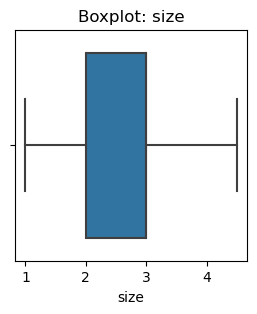

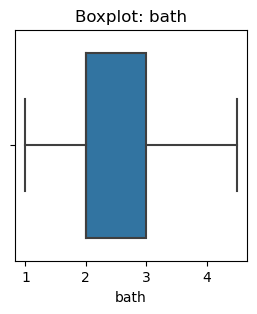

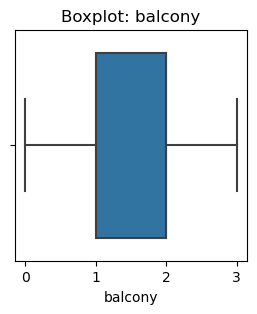

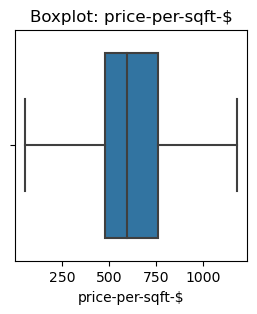

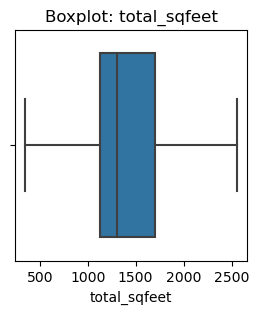

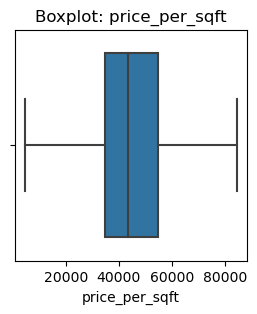

In [44]:
for i in irish_house_price.select_dtypes(include= "float").columns:
    plt.figure(figsize= (3, 3))
    sns.boxplot(x= i, data= irish_house_price)  
    plt.title(f'Boxplot: {i}')
    plt.show()  

In [45]:
irish_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11470 non-null  int64  
 1   area_type         11470 non-null  object 
 2   availability      11470 non-null  object 
 3   location          11470 non-null  object 
 4   size              11470 non-null  float64
 5   total_sqft        11470 non-null  object 
 6   bath              11470 non-null  float64
 7   balcony           11470 non-null  float64
 8   BER               11470 non-null  object 
 9   price-per-sqft-$  11470 non-null  float64
 10  total_sqfeet      11470 non-null  float64
 11  price_per_sqft    11470 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


# Cleaned data [Export the data for Tableau visualization]

In [93]:
irish_house_price.to_csv(r"/Users/leharrana/Documents/ML, Python and projects/ML Projects/irish_house_price_dashboard.csv")

# Exploratory data analysis [After data cleansing]

In [49]:
irish_house_price.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
ID,11470.000000,6678.045597,3835.478522,0.000000,3370.250000,6683.500000,9985.750000,13319.000000
size,11470.000000,2.571927,0.750630,1.000000,2.000000,3.000000,3.000000,4.500000
bath,11470.000000,2.467611,0.808567,1.000000,2.000000,2.000000,3.000000,4.500000
balcony,11470.000000,1.623540,0.785386,0.000000,1.000000,2.000000,2.000000,3.000000
price-per-sqft-$,11470.000000,643.116208,228.357285,56.750000,476.700000,596.133963,756.666667,1176.616667
total_sqfeet,11470.000000,1460.965741,501.642639,350.000000,1128.000000,1307.000000,1698.750000,2554.875000
price_per_sqft,11470.000000,45815.399909,15889.350419,4649.918073,34598.384392,43420.128268,54564.028605,84512.494924


<Axes: >

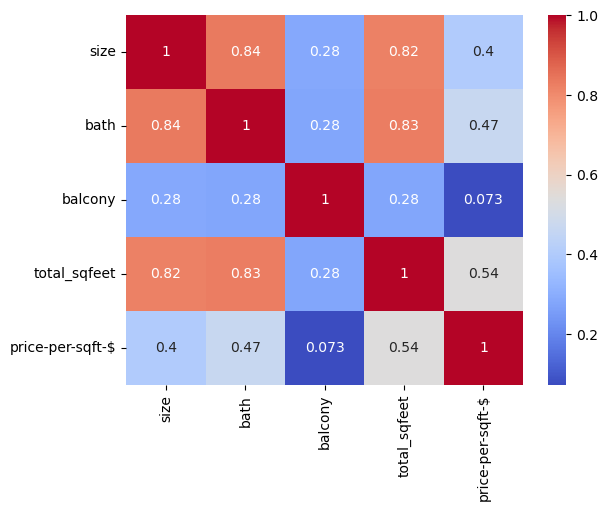

In [51]:
ihp = ["size", "bath", "balcony", "total_sqfeet", "price-per-sqft-$"]
sns.heatmap(irish_house_price[ihp].corr(),cmap= "coolwarm", annot= True)

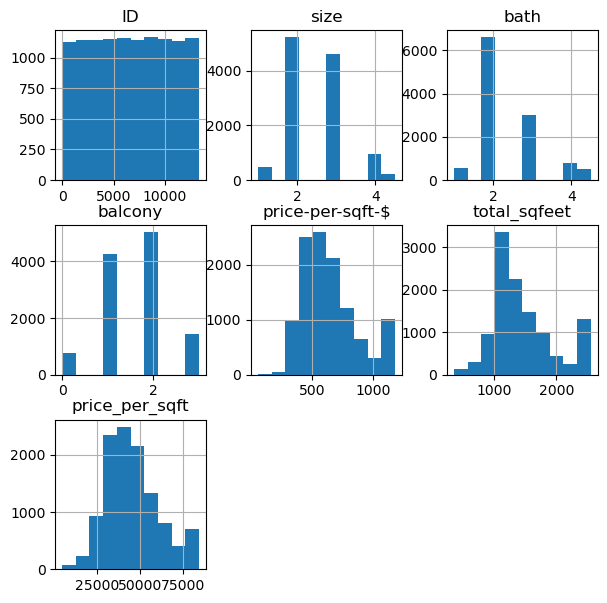

In [52]:
fig = irish_house_price.hist(figsize= (7,7))

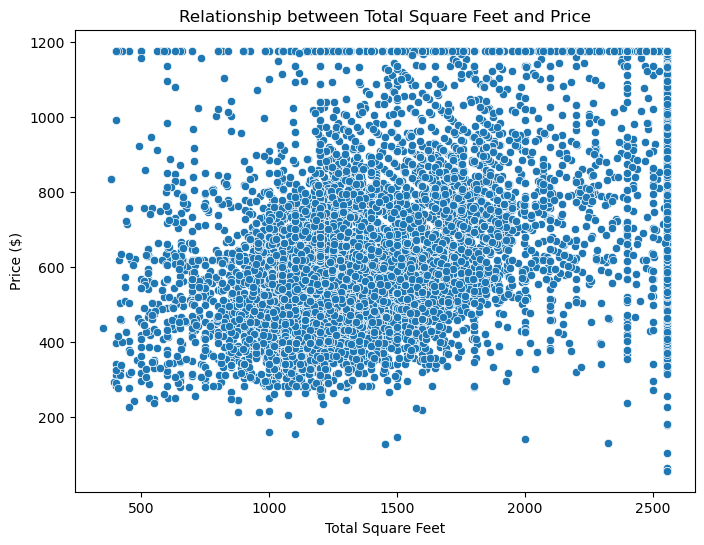

In [53]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= 'total_sqfeet', y= 'price-per-sqft-$', data= irish_house_price)
plt.title('Relationship between Total Square Feet and Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price ($)')
plt.show()

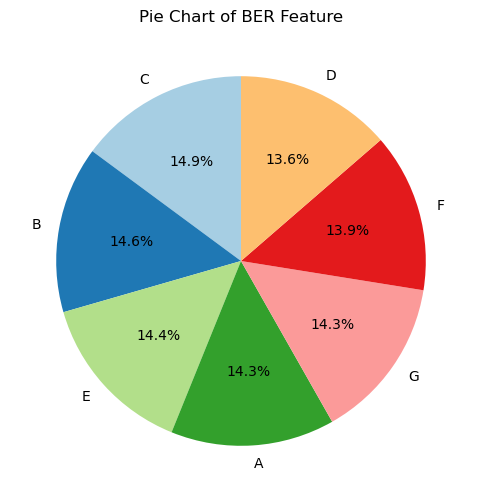

In [54]:
ber_counts = irish_house_price['BER'].value_counts()

plt.figure(figsize=(6, 6))  
plt.pie(ber_counts, labels= ber_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title("Pie Chart of BER Feature")
plt.show()

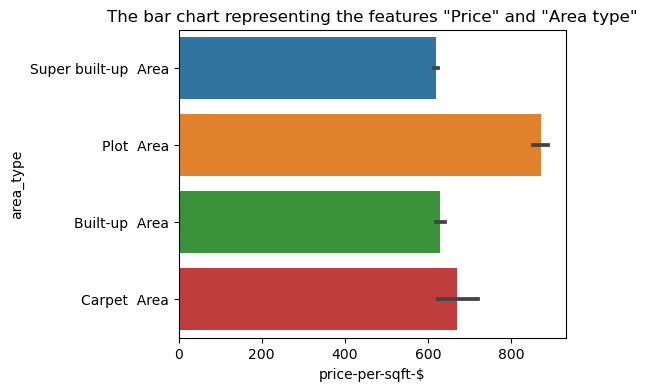

In [55]:
plt.figure(figsize=(5, 4))
sns.barplot(x= 'price-per-sqft-$', y= 'area_type', data= irish_house_price)

plt.title("The bar chart representing the features \"Price\" and \"Area type\"")
plt.show()

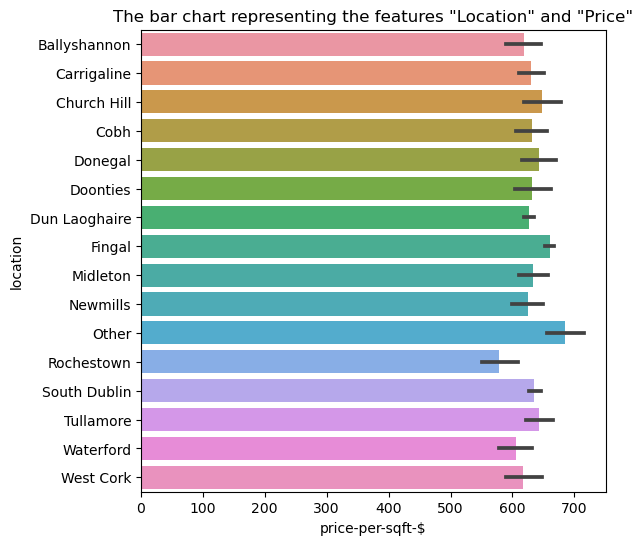

In [56]:
plt.figure(figsize=(6, 6))
sns.barplot(x= 'price-per-sqft-$', y= 'location', data= irish_house_price)

plt.title("The bar chart representing the features \"Location\" and \"Price\"")
plt.show()

# Summary


In [58]:
irish_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11470 non-null  int64  
 1   area_type         11470 non-null  object 
 2   availability      11470 non-null  object 
 3   location          11470 non-null  object 
 4   size              11470 non-null  float64
 5   total_sqft        11470 non-null  object 
 6   bath              11470 non-null  float64
 7   balcony           11470 non-null  float64
 8   BER               11470 non-null  object 
 9   price-per-sqft-$  11470 non-null  float64
 10  total_sqfeet      11470 non-null  float64
 11  price_per_sqft    11470 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


# Feature engineering

In [60]:
irish_house_price.drop(['ID', 'total_sqft'], axis=1, inplace=True)
irish_house_price.head()

,area_type,availability,location,size,bath,balcony,BER,price-per-sqft-$,total_sqfeet,price_per_sqft
0,Super built-up Area,Ready To Move,Ballyshannon,3.0,3.0,1.0,B,584.696970,1650.0,35436.179982
1,Super built-up Area,Ready To Move,Ballyshannon,3.0,2.0,1.0,G,582.267658,1345.0,43291.275688
2,Super built-up Area,Ready To Move,Ballyshannon,3.0,2.0,1.0,D,794.914738,1642.0,48411.372600
3,Plot Area,Ready To Move,Ballyshannon,3.0,2.0,0.0,E,624.250000,1200.0,52020.833333
4,Super built-up Area,Ready To Move,Ballyshannon,3.0,2.0,1.0,A,464.558139,1075.0,43214.710651


In [61]:
irish_house_price1 = irish_house_price.drop(['area_type', 'availability', 'location', 'BER'], axis= 1)
irish_house_price1.head()

,size,bath,balcony,price-per-sqft-$,total_sqfeet,price_per_sqft
0,3.0,3.0,1.0,584.696970,1650.0,35436.179982
1,3.0,2.0,1.0,582.267658,1345.0,43291.275688
2,3.0,2.0,1.0,794.914738,1642.0,48411.372600
3,3.0,2.0,0.0,624.250000,1200.0,52020.833333
4,3.0,2.0,1.0,464.558139,1075.0,43214.710651


# Encoding categorical variables

In [63]:
irish_house_price2 = pd.get_dummies(irish_house_price, drop_first= True, columns= ['area_type', 'availability', 'location', 'BER'])
irish_house_price2.head()

,size,bath,balcony,price-per-sqft-$,total_sqfeet,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Feb,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Nov,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Feb,availability_20-Jan,availability_20-Jul,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Aug,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move,location_Carrigaline,location_Church Hill,location_Cobh,location_Donegal,location_Doonties,location_Dun Laoghaire,location_Fingal,location_Midleton,location_Newmills,location_Other,location_Rochestown,location_South Dublin,location_Tullamore,location_Waterford,location_West Cork,BER_B,BER_C,BER_D,BER_E,BER_F,BER_G
0,3.0,3.0,1.0,584.696970,1650.0,35436.179982,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,3.0,2.0,1.0,582.267658,1345.0,43291.275688,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,3.0,2.0,1.0,794.914738,1642.0,48411.372600,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,3.0

In [64]:
irish_house_price2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Columns: 108 entries, size to BER_G
dtypes: bool(102), float64(6)
memory usage: 1.6 MB


# Training and testing the data set

In [66]:
x = irish_house_price2.drop('price-per-sqft-$', axis= 1)
y = irish_house_price2['price-per-sqft-$']

In [67]:
print(x.shape)

(11470, 107)


In [68]:
print(y.shape)

(11470,)


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42) 

In [70]:
print("x:train shape:", x_train.shape)
print("x:test shape:", x_test.shape)
print("y:train shape:", y_train.shape)
print("y:test shape:", y_test.shape)

x:train shape: (9176, 107)
x:test shape: (2294, 107)
y:train shape: (9176,)
y:test shape: (2294,)


# Feature scaling technique using StandardScaler

In [72]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# Machine Learning model building

# Linear Regression

In [74]:
linear = LinearRegression()
linear_lasso = Lasso()
linear_ridge = Ridge()

In [75]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [76]:
linear.fit(x_train, y_train)

linear_score = linear.score(x_test, y_test)
linear_rmse = rmse(y_test, linear.predict(x_test))

print(f"The score for Linear Regression model: {linear_score}")
print(f"The RMSE for Linear Regression model: {linear_rmse}")

The score for Linear Regression model: -5.713811641682025e+19
The RMSE for Linear Regression model: 1707388579644.6204


# Lasso Regression

In [77]:
linear_lasso = Lasso() 
linear_lasso.fit(x_train, y_train)

linear_lasso_score = linear_lasso.score(x_test, y_test).round(2)

linear_lasso_predictions = linear_lasso.predict(x_test)
linear_lasso_rmse = mean_squared_error(y_test, linear_lasso_predictions, squared=False).round(2)

print(f"The score for Lasso Regression model: {linear_lasso_score}")
print(f"The RMSE for Lasso Regression model: {linear_lasso_rmse}")

The score for Lasso Regression model: 0.89
The RMSE for Lasso Regression model: 76.08


# Support Vector Machine

In [78]:
svr = SVR()

svr.fit(x_train, y_train)
svr_score = svr.score(x_test, y_test).round(2)
svr_rmse = rmse(y_test, svr.predict(x_test)).round(2)

print(f"The score for Support Vector Machine model: {svr_score}")
print(f"The RMSE for Support Vector Machine model: {svr_rmse}")

The score for Support Vector Machine model: 0.34
The RMSE for Support Vector Machine model: 184.14


# Random Forest Regressor

In [79]:
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
random_forest_score = random_forest.score(x_test, y_test).round(2)
random_forest_rmse = rmse(y_test, random_forest.predict(x_test)).round(2)

print(f"The score for Random Forest Regressor model: {random_forest_score}")
print(f"The RMSE for Random Forest Regressor model: {random_forest_rmse}")

The score for Random Forest Regressor model: 0.96
The RMSE for Random Forest Regressor model: 47.62


# XG Boost Regressor

In [80]:
xg_boost = xgboost.XGBRegressor()

xg_boost.fit(x_train, y_train)
xg_boost_score = xg_boost.score(x_test, y_test).round(2)
xg_boost_rmse = rmse(y_test, xg_boost.predict(x_test)).round(2)

print(f"The score for XGBoost Regressor model: {xg_boost_score}")
print(f"The RMSE for XGBoost Regressor model: {xg_boost_rmse}")

The score for XGBoost Regressor model: 0.95
The RMSE for XGBoost Regressor model: 50.56


# Gradient Boosting Regressor

In [81]:
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(x_train, y_train)

gradient_boost_score = gradient_boost.score(x_test, y_test).round(2)
gradient_boost_rmse = np.sqrt(mean_squared_error(y_test, gradient_boost.predict(x_test))).round(2)

print(f"The score for Gradient Boosting Regressor model: {gradient_boost_score}")
print(f"The RMSE for Gradient Boosting Regressor model: {gradient_boost_rmse}")

The score for Gradient Boosting Regressor model: 0.95
The RMSE for Gradient Boosting Regressor model: 48.59


# Machine Learning: "Algorithms", "Score" and "Root Mean Squared Error"

In [83]:
machine_learning_summary_table = pd.DataFrame({
    'ML algorithm': ['Linear Regression', 'Lasso Regression', 'Support Vector Machine', 'Random Forest', 'XGBoost', 'Gradient Descent'],
    'Score': [linear_score, linear_lasso_score, svr_score, random_forest_score, xg_boost_score, gradient_boost_score],
    'RMSE':[linear_rmse, linear_lasso_rmse, svr_rmse, random_forest_rmse, xg_boost_rmse, gradient_boost_rmse]})

print("Machine Learning algorithm summary table:\n")
print(tabulate(machine_learning_summary_table.round(2), headers='keys', tablefmt='pretty'))

Machine Learning algorithm summary table:

+---+------------------------+------------------------+------------------+
|   |      ML algorithm      |         Score          |       RMSE       |
+---+------------------------+------------------------+------------------+
| 0 |   Linear Regression    | -5.713811641682025e+19 | 1707388579644.62 |
| 1 |    Lasso Regression    |          0.89          |      76.08       |
| 2 | Support Vector Machine |          0.34          |      184.14      |
| 3 |     Random Forest      |          0.96          |      47.62       |
| 4 |        XGBoost         |          0.95          |      50.56       |
| 5 |    Gradient Descent    |          0.95          |      48.59       |
+---+------------------------+------------------------+------------------+


# Hyper tuning techniques

# Linear Regression

In [85]:
from sklearn.model_selection import cross_val_score


linear_scores = cross_val_score(linear, x_train, y_train, cv=10) 
print("Cross-validation scores for Linear Regression:", linear_scores)
print('\n')
print("Cross-validation scores:", linear_scores.mean())

Cross-validation scores for Linear Regression: [ 8.88735301e-01 -2.01022514e+17 -1.38595643e+22 -2.27601690e+22
  8.92236422e-01  8.83693733e-01 -5.51256468e+18 -5.40631627e+21
  8.78437283e-01 -5.21328658e+24]


Cross-validation scores: -5.255318340206734e+23


# Lasso Regression

In [86]:
linear_lasso_scores = cross_val_score(linear_lasso, x_train, y_train, cv=10)  
print("Cross-validation scores for Linear Lasso Regression:", linear_lasso_scores)
print('\n')
print("Cross-validation scores:", linear_lasso_scores.mean())

Cross-validation scores for Linear Lasso Regression: [0.88747116 0.86611313 0.87787238 0.87844624 0.89319923 0.88366019
 0.88942582 0.86848523 0.87968116 0.86838367]


Cross-validation scores: 0.8792738208845737


# Support Vector Machine

In [87]:
svr_scores = cross_val_score(svr, x_train, y_train, cv=10)  
print("Cross-validation scores for Support Vector Machine:", svr_scores)
print('\n')
print("Cross-validation scores:", svr_scores.mean())

Cross-validation scores for Support Vector Machine: [0.3078405  0.289005   0.31660432 0.30349653 0.29653803 0.30137737
 0.31310818 0.30286432 0.32483372 0.32497868]


Cross-validation scores: 0.3080646651772906


# Random Forest Regressor

In [88]:
random_forest_scores = cross_val_score(random_forest, x_train, y_train, cv=10)  
print("Cross-validation scores for Random Forest Regressor:", random_forest_scores)
print('\n')
print("Cross-validation scores:", random_forest_scores.mean())

Cross-validation scores for Random Forest Regressor: [0.95973083 0.94014768 0.95655057 0.94731569 0.9659114  0.96916191
 0.97390568 0.95998816 0.94976013 0.93390917]


Cross-validation scores: 0.9556381217868148


# XG Boost

In [89]:
xg_boost_scores = cross_val_score(xg_boost, x_train, y_train, cv=10)
print("Cross-validation scores for XG Boost Regressor:", xg_boost_scores)
print('\n')
print("Cross-validation scores:", xg_boost_scores.mean())

Cross-validation scores for XG Boost Regressor: [0.95307076 0.93442327 0.95593784 0.95199529 0.96010243 0.96305964
 0.96638937 0.95357961 0.94445321 0.93859773]


Cross-validation scores: 0.952160913521659


# Gradient Boost

In [90]:
gradient_boost_scores = cross_val_score(gradient_boost, x_train, y_train, cv=10)
print("Cross-validation scores for Gradient Boost Regressor:", gradient_boost_scores)
print('\n')
print("Cross-validation scores:", gradient_boost_scores.mean())

Cross-validation scores for Gradient Boost Regressor: [0.95391209 0.93821103 0.95334401 0.94184595 0.95902146 0.95896604
 0.96250637 0.94965956 0.94932092 0.93200253]


Cross-validation scores: 0.9498789948248717


# Machine Learning: "Cross Validation score"

In [92]:
cross_validation_summary_table = pd.DataFrame({
    'ML algorithm': ['Linear Regression', 'Lasso Regression', 'Support Vector Machine', 'Random Forest', 'XGBoost', 'Gradient Descent'],
    'Score': [linear_scores, linear_lasso_scores, svr_scores, random_forest_scores, xg_boost_scores, gradient_boost_scores]})

print("Cross validation summary table:\n")
print(tabulate(cross_validation_summary_table.round(2), headers='keys', tablefmt='pretty'))

print('\n')
print(f"The cross validation score for Linear Regression: {linear_scores.mean().round(2)}")
print(f"The cross validation score for Lasso Regression: {linear_lasso_scores.mean().round(2)}")
print(f"The cross validation score for Support Vector Machine: {svr_scores.mean().round(2)}")
print(f"The cross validation score for Random Forest Regressor: {random_forest_scores.mean().round(2)}")
print(f"The cross validation score for XGBoost Regressor: {xg_boost_scores.mean().round(2)}")
print(f"The cross validation score for Gradient Descent Regressor: {gradient_boost_scores.mean().round(2)}")

Cross validation summary table:

+---+------------------------+--------------------------------------------------------------------+
|   |      ML algorithm      |                               Score                                |
+---+------------------------+--------------------------------------------------------------------+
| 0 |   Linear Regression    |  [ 8.88735301e-01 -2.01022514e+17 -1.38595643e+22 -2.27601690e+22  |
|   |                        |    8.92236422e-01  8.83693733e-01 -5.51256468e+18 -5.40631627e+21  |
|   |                        |                   8.78437283e-01 -5.21328658e+24]                  |
| 1 |    Lasso Regression    | [0.88747116 0.86611313 0.87787238 0.87844624 0.89319923 0.88366019 |
|   |                        |            0.88942582 0.86848523 0.87968116 0.86838367]            |
| 2 | Support Vector Machine | [0.3078405  0.289005   0.31660432 0.30349653 0.29653803 0.30137737 |
|   |                        |            0.31310818 0.30286432 0.3

# Hyper parameter tuning

# Hyper parameter tuning technique for "Random Forest Regressor"

In [96]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator= RandomForestRegressor(random_state= 42), param_grid= param_grid, cv= 5, scoring= 'neg_mean_squared_error', verbose= 2)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, min_s

In [97]:
best_rf = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42)

best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)

score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest Regressor with best parameters:")
print(f"R² Score: {score:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Random Forest Regressor with best parameters:
R² Score: 0.96
Root Mean Squared Error (RMSE): 46.04


Hyperparameter Tuning Technique for XGBoost Regressor



In [98]:
best_xgb = XGBRegressor(
    max_depth=20,
    learning_rate=0.1,  
    n_estimators=300,
    min_child_weight=1,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42)

best_xgb.fit(x_train, y_train)
y_pred = best_xgb.predict(x_test)

score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost Regressor with best parameters:")
print(f"R² Score: {score:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

XGBoost Regressor with best parameters:
R² Score: 0.93
Root Mean Squared Error (RMSE): 61.58


# Hyper parameter tuning technique for "Gradient Boosting Regressor"

In [99]:
best_gb = GradientBoostingRegressor(
    max_depth=20,                
    learning_rate=0.1,           
    n_estimators=300,            
    min_samples_split=10,      
    min_samples_leaf=1,        
    subsample=0.8,               
    random_state=42)

best_gb.fit(x_train, y_train)
y_pred = best_gb.predict(x_test)

score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Gradient Boosting Regressor with best parameters:")
print(f"R² Score: {score:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Gradient Boosting Regressor with best parameters:
R² Score: 0.95
Root Mean Squared Error (RMSE): 52.35


Conclusion  

The Irish House Price Prediction project successfully leverages data-driven methodologies to analyze and predict property prices in Ireland. By systematically exploring key variables such as location, size, number of bathrooms, balconies, total square footage, and energy ratings (BER), the project provides valuable insights into the factors that influence housing costs.  

Through Exploratory Data Analysis (EDA), Data Preprocessing, Feature Engineering, and Model Building, multiple machine learning models were evaluated, ensuring a robust approach to price prediction. The Random Forest Regressor, after fine-tuning through hyperparameter optimization, emerged as the best-performing model with an impressive R² Score of 0.96, indicating high predictive accuracy.  

These findings can assist real estate professionals, buyers, and policymakers in making data-backed decisions. The project not only highlights the importance of key housing features but also demonstrates the potential of machine learning in real estate forecasting, paving the way for more data-centric approaches in property valuation.